In [1]:
from sklearn.feature_selection import mutual_info_classif           # Information Gain for classification task
from sklearn.feature_selection import chi2                          # chi-square feature selection method
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE                           # Recurssive feature elimination algorithm
from sklearn.feature_selection import SequentialFeatureSelector     # Forward feature selectioin method
from sklearn.linear_model import LassoCV , RidgeCV                  # lasso and ridge cross validation algorithms for feature selection
from sklearn.feature_selection import SelectFromModel               # to select features according to prefit LassoCV and RidgeCV
import pandas as pd

### Dataset Loading ###

In [2]:
PATH = './data/ld2/Default_Fin.csv'
Target_Variable = 'Defaulted?'

frame = pd.read_csv(PATH)

In [3]:
frame.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
frame.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [5]:
for i in frame.columns[frame.isna().sum() > 0]:
    frame[i] = frame[i].interpolate('linear')

In [6]:
frame.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [7]:
frame = frame.dropna()
frame

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [8]:
from sklearn.model_selection import train_test_split

X = frame.drop([Target_Variable],axis=1)
Y = frame[Target_Variable]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [9]:
len(X.columns)

4

### Chi-Square Feature Selection ###

In [10]:
chi2_stats, p_values = chi2(X, Y)

In [11]:
from sklearn.feature_selection import SelectKBest
k = 3
chi2_selector = SelectKBest(chi2, k=k) 
X_new = chi2_selector.fit_transform(X, Y) 
  
selected_features = frame.columns[:-1][chi2_selector.get_support()] 
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['Index', 'Bank Balance', 'Annual Salary'], dtype='object')


<BarContainer object of 4 artists>

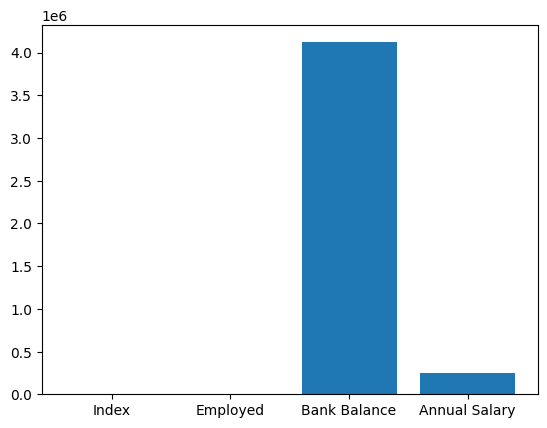

In [12]:
import matplotlib.pyplot as plt

plt.bar(X.columns,chi2_stats)

<BarContainer object of 4 artists>

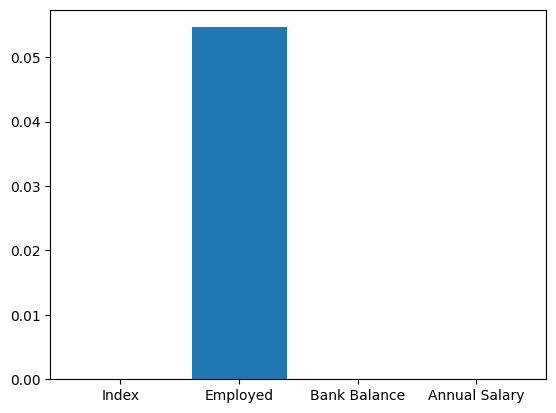

In [13]:
import matplotlib.pyplot as plt

plt.bar(X.columns,p_values)

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9724242424242424

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9715151515151516

### Mutual Info ###

In [16]:
fs = mutual_info_classif(X,Y)

In [17]:
len(fs)

4

<BarContainer object of 4 artists>

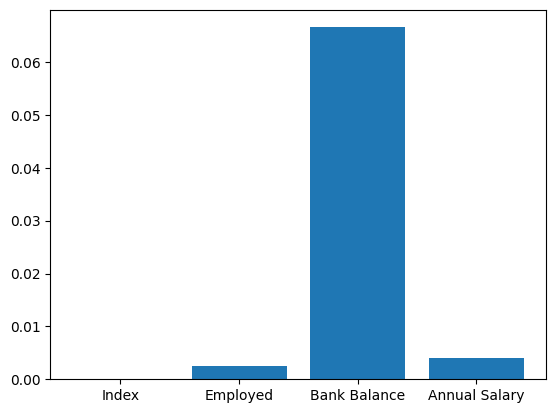

In [18]:
import matplotlib.pyplot as plt

plt.bar(X.columns,fs)

In [19]:
selected_features = X.columns[fs > 0.05] 
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['Bank Balance'], dtype='object')


In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000000)
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9718181818181818

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9566666666666667

### Forward Selection Method ###

In [22]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
sfs = SequentialFeatureSelector(clf,n_features_to_select=3)
sfs.fit(X, Y)
sfs.get_support()

/media/warlock/Work/FSPW/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ True, False,  True,  True])

In [23]:
selected_features = X.columns[sfs.get_support()] 
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['Index', 'Bank Balance', 'Annual Salary'], dtype='object')


In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000000)
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9724242424242424

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
sfs = SequentialFeatureSelector(clf,n_features_to_select=3,n_jobs=16)
sfs.fit(X, Y)
sfs.get_support()

array([False,  True,  True,  True])

In [26]:
selected_features = X.columns[sfs.get_support()] 
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['Employed', 'Bank Balance', 'Annual Salary'], dtype='object')


In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9681818181818181

### Recurssive Feature Elimination ###

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

estimator = LogisticRegression(max_iter=100000)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, Y)
selector.support_

/media/warlock/Work/FSPW/venv/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


array([ True,  True,  True,  True])

In [29]:
selected_features = X.columns[selector.support_] 
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary'], dtype='object')


In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

/media/warlock/Work/FSPW/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.97

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, Y)
selector.support_

/media/warlock/Work/FSPW/venv/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


array([ True,  True,  True,  True])

In [32]:
selected_features = X.columns[selector.support_] 
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary'], dtype='object')


In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9684848484848485

### Lasso Regx Feature Selection ###

In [34]:
from sklearn.linear_model import LassoCV

clf = LassoCV()
clf.fit(X, Y)
clf.coef_

array([-3.61739079e-07,  0.00000000e+00,  1.09393052e-05,  3.80575166e-08])

In [35]:
selected_features = X.columns[clf.coef_ != 0]
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['Index', 'Bank Balance', 'Annual Salary'], dtype='object')


In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9724242424242424

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9712121212121212

### Ridge Regression For Feature Selection ###

In [38]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV()
clf.fit(X, Y)
clf.coef_

array([-5.43596798e-07,  1.02091419e-02,  1.10593276e-05,  1.74259185e-08])

In [39]:
selected_features = X.columns[clf.coef_ > 0.01]
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['Employed'], dtype='object')


In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9666666666666667

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9666666666666667